---
title: "Explicit expressions for the fields in HCP configuration"
jupyter: python3
---

In [1]:
#| echo: false
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def pos(data):
    """Return positive data; set negative data to NaN."""
    return np.where(data > 0, data, np.nan)

## Motivation

Often, the knowledge of the electric and/or magnetic field at the surface of a homogeneous Earth is sufficient.
However, the calculation of the Hankel integral is -- even in the homogeneous case -- numerically not trivial.

Later we will learn how to evaluate them properly.

For now, let's simplify the configuration by setting $h=0$ and $z=0$.
We refer to this configuration as the _horizontal coplanar configuration_ (which is generally not restricted to the plane $z=0$).

With the help of this simplification it is possible to rewrite the integrals.
The results are closed form expressions.

It is possible to estimate what field amplitudes can be expected at a given offset-frequency regime.

## Recall of VMD expressions

In a conducting medium with $\lambda_1^2 = \lambda^2 - k_1^2$, $h=0$, and $z=0$, there holds

::: {.callout-tip title="Expressions for coplanar configuration at z=0, h=0:"}

$$
	\begin{equation}
	    E_\varphi = -\frac{i \omega \mu m}{2 \pi} \int_0^\infty \frac{\lambda^2}{\lambda + \lambda_1}
	    J_1(\lambda r) \, \dd\lambda
	\end{equation}
$$
	
$$
	\begin{equation}
	    H_r = \frac{m}{2 \pi} \int_0^\infty \frac{\lambda_1 \lambda^2}{\lambda + \lambda_1}
	    J_1(\lambda r) \, \dd\lambda
	\end{equation}
$$
	
$$
	\begin{equation}
	    H_z = \frac{m}{2 \pi} \int_0^\infty \frac{\lambda^3}{\lambda + \lambda_1}
	    J_0(\lambda r) \, \dd\lambda
	\end{equation}
$$

:::

## Electric field

In the following we try to _rewrite_ the integral. Recalling the properties of the Bessel function we first write
$$
\begin{equation}
    E_\varphi = \frac{i \omega \mu m}{2 \pi}
    \partial_r
    \int_0^\infty \frac{\lambda}{\lambda + \lambda_1}
    J_0(\lambda r) \, \dd\lambda
\end{equation}
$$
Second, we expand the integrand with $\lambda - \lambda_1$, i.e.,
$$
\frac{\lambda}{\lambda + \lambda_1} = 
\frac{\lambda(\lambda - \lambda_1)}{\lambda^2 - \lambda_1^2} =
\frac{1}{k_1^2} \left(
\lambda^2 - \lambda \lambda_1
\right)
$$

We obtain
$$
\begin{equation}
    E_\varphi = \frac{i \omega \mu m}{2 \pi k_1^2}
    \partial_r
    \left[
    \int_0^\infty \lambda^2
    J_0(\lambda r) \, d\lambda -
    \int_0^\infty \lambda \lambda_1
    J_0(\lambda r) \, \dd\lambda
    \right].
\end{equation}
$$

### The Weber integral
With $R^2 = r^2 + z^2$ there holds the following identity (_Weber_ integral)
$$
\begin{equation}
\frac{1}{R} = \int_0^\infty
e^{-\lambda z} J_0(\lambda r)\, d\lambda.
\end{equation}
$$
After differentiating twice w.r.t. $z$, we obtain
$$
\frac{\partial^2}{\partial z^2} \frac{1}{R} = \int_0^\infty
\lambda^2 e^{-\lambda z} J_0(\lambda r)\, \dd\lambda.
$$

$$
\frac{\partial^2}{\partial z^2} \frac{1}{R}  \bigg|_{z=0} = 
\int_0^\infty
\lambda^2 J_0(\lambda r)\, \dd\lambda.
$$
We see, that for $z=0$ this is the first integral in the above expression of $E_\varphi$.

### The Sommerfeld integral
The _Sommerfeld_ integral is
$$
\begin{equation}
\frac{e^{-i k_1 R}}{R} = \int_0^\infty
\frac{\lambda}{\lambda_1}
e^{-\lambda_1 z} J_0(\lambda r)\, \dd\lambda.
\end{equation}
$$
Likewise, we obtain the second integral expression when we differentiate the _Sommerfeld_ integral twice w.r.t. $z$:
$$
\frac{\partial^2}{\partial z^2} \frac{e^{-i k_1 R}}{R} = \int_0^\infty
{\lambda}{\lambda_1}
e^{-\lambda_1 z} J_0(\lambda r)\, \dd\lambda
$$

$$
\frac{\partial^2}{\partial z^2} \frac{e^{-i k_1 R}}{R}\bigg|_{z=0} = \int_0^\infty
{\lambda}{\lambda_1}
J_0(\lambda r)\, \dd\lambda
$$

We see that we are able to express the above integrals in the expression for $E_\varphi$ by means of derivatives of the _Weber_ and _Sommerfeld_ integrals.

The point is, that we can replace the integrals _just by functions of_ $R$!

## Magnetic field

The expressions for $B_z$ and $B_r$ can be obtained in a similar fashion.

Note that the conversion for $B_r$ is slightly more involved.

## Implementation for $E_\varphi$

We define `sympy` expressions and let `Python` do the work for us.


In [2]:
r = sp.symbols('r', positive=True, real=True)
z = sp.symbols('z', real=True)
k = sp.symbols('k')
R = sp.sqrt(r**2 + z**2)
G = sp.exp(-sp.I * k * R ) / R
G

exp(-I*k*sqrt(r**2 + z**2))/sqrt(r**2 + z**2)

The second derivative of the Weber integral, i.e., $1/R$, w.r.t. $z$ is


In [3]:
Rzz = sp.diff(1 / R, z, 2)
Rzz.simplify()

(-r**2 + 2*z**2)/(r**2 + z**2)**(5/2)

Now, we set $z=0$ and obtain


In [4]:
Rzz.subs(z, 0)

-1/r**3

i.e.,
$$
\pdv[2]{}{z} \frac{1}{R} \bigg|_{z=0} = -\frac{1}{r^3}.
$$
Further, the left-hand side of the Sommerfeld integral is
$$
\frac{e^{-i k_1 R}}{R},
$$
and its second derivative w.r.t. $z$ is


In [5]:
Gzz = sp.diff(G, z, 2)
Gzz.simplify()

(2*I*k*z**2*(r**2 + z**2)**6 - k*(r**2 + z**2)**(9/2)*(k*z**2*(r**2 + z**2)**2 - I*z**2*(r**2 + z**2)**(3/2) + I*(r**2 + z**2)**(5/2)) + (-r**2 + 2*z**2)*(r**2 + z**2)**(11/2))*exp(-I*k*sqrt(r**2 + z**2))/(r**2 + z**2)**8

which, after setting $z=0$, becomes


In [6]:
Gzz.subs(z, 0).simplify()

(-I*k*r - 1)*exp(-I*k*r)/r**3

Finally, we apply the derivative w.r.t. $r$ to both results and obtain


In [7]:
ex = sp.diff(Rzz, r).subs(z,0) - sp.diff(Gzz, r).subs(z, 0)
ex.simplify()

(k**2*r**2 - 3*I*k*r + 3*exp(I*k*r) - 3)*exp(-I*k*r)/r**4

We recognize that
$$
\pdv{}{r} \left[
    \int_0^\infty \lambda^2
    J_0(\lambda r) \, \dd\lambda -
    \int_0^\infty \lambda \lambda_1
    J_0(\lambda r) \, \dd\lambda
    \right] = 
    \frac{
    3 - (3 + 3 ikr - k^2 r^2) e^{-ikr}}{r^4}.
$$

Incorporating the leading factor of $E_\varphi$ we get the result
$$
E_\varphi(r, \omega) = \frac{i \omega \mu m}{2 \pi k^2 r^4} \left[
3 - (3 + 3 ikr - k^2 r^2) e^{-ikr}
\right]
$$

For later evaluation we implement this result as a function:


In [8]:
def Ephi(r, omega, sigma):
    mu_0 = np.pi * 4e-7
    k = np.sqrt(-1j * omega * mu_0 * sigma)
    E = 3 - (3 + 3 * 1j * k * r - k**2 * r**2) * \
        np.exp(-1j * k * r)
    E *= 1j * omega * mu_0 / (2 * np.pi * k**2 * r**4)
    return E

## Implementation for $H_r$ and $H_z$

For the magnetic field we find closed-form expressions using similar tricks.

Specifically, we obtain
$$
B_r(r, \omega) = -\frac{\mu m k^2}{4 \pi r} \left[
I_1(\alpha)K_1(\alpha) - I_2(\alpha)K_2(\alpha)
\right]
$$

$$
B_z(r, \omega) = \frac{\mu m}{2 \pi k^2 r^5} \left[
9 - (9 + 9ikr - 4k^2 r^2 - ik^3r^3) e^{-ikr}
\right]
$$

The functions $I_1, I_2, K_1, K_2$ are the _modified Bessel functions_ of the first kind and order 1 and 2 with complex argument $\alpha = \dfrac{ikr}{2}$.

`Python` implementation:


In [9]:
from scipy.special import kv, iv

# iv = lambda n, z: 1j ** (-n) * jv(n, 1j * z)

def Br(r, omega, sigma):
    mu_0 = np.pi * 4e-7
    k = np.sqrt(-1j * omega * mu_0 * sigma)
    alpha = 1j * k * r / 2.0
    B = iv(1, alpha) * kv(1, alpha) - iv(2, alpha) * kv(2, alpha)
    B *= -mu_0 * k**2 / (4 * np.pi * r)
    return B

def Bz(r, omega, sigma):
    mu_0 = np.pi * 4e-7
    k = np.sqrt(-1j * omega * mu_0 * sigma)
    B = 9 - (9 + 9 * 1j * k * r - 4 * k**2 * r**2 - 1j * k**3 * r**3) * np.exp(-1j * k * r)
    B *= mu_0 / (2 * np.pi * k**2 * r**5)
    return B

## Examples

As an example, we choose a homogeneous ground with conductivity $\sigma = 0.01$ S/m.
The transmitter-receiver offset is $100$ m.
The frequencies cover a range from $10^{-1} \le f \le 10^5$ Hz.


In [10]:
r = 100.0
sigma = 0.01
f = np.logspace(-1, 5, 301, endpoint=True)
E_phi = [Ephi(r, 2 * np.pi * v, sigma) for v in f]
B_r = [Br(r, 2 * np.pi * v, sigma) for v in f]
B_z = [Bz(r, 2 * np.pi * v, sigma) for v in f]

In [11]:
def plotfield(f, field):
    fig, ax = plt.subplots(1, 1, figsize=(6,3))
    ax.loglog(f, pos(np.real(field)), 'C0-', label='+re')
    ax.loglog(f, pos(-np.real(field)), 'C0--', label='-re')
    ax.loglog(f, pos(np.imag(field)), 'C1-', label='+im')
    ax.loglog(f, pos(-np.imag(field)), 'C1--', label='-im')
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('f in Hz')
    return ax

<Axes: xlabel='f in Hz', ylabel='$E_\\varphi$ in V/m'>

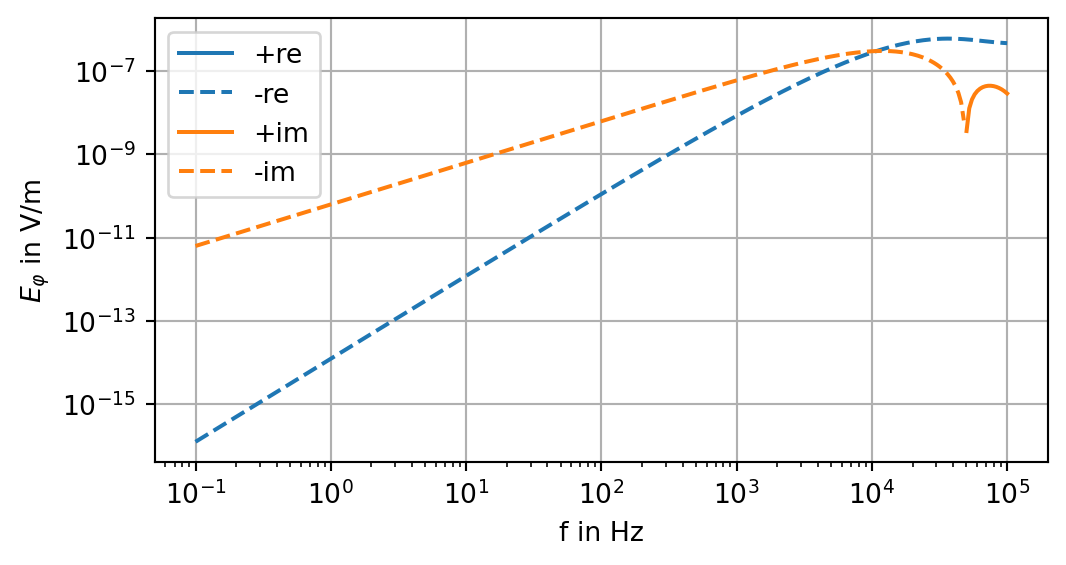

In [12]:
ax = plotfield(f, E_phi)
ax.set_ylabel(r'$E_\varphi$ in V/m')
ax